<h1><center>HW2 Convolutional neural networks for text classification
</center></h1>

In this homework you will learn how to build a simple convolutional neural networks (1 convolution layer with max pooling + 1 activation layer) from scratch, and use the model to solve text classification problem. As optional, you also have a chance to build real life CNN models using Keras + Tensorflow and use it to challenge the model you build from scratch. 
    

<h3> 1. Math preliminaries </h3>

Please answer all these questions:

1. What is the form of sigmoid function $σ(z)$ ? Show that $σ′(z) = σ(z)[1 − σ(z)]$.
<br/>

**Solution:**
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
$$\sigma(z)^\prime = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}}(\frac{e^{-z}}{1+e^{-z}}) = \sigma(x)(1-\sigma(z))$$

2. Another popular activation function is $tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}$ , show that $tanh′(z) = 1 − tanh(z)^2$.
<br/>

**Solution:**
$$\tanh(z)^\prime = \frac{(e^z + e^{-z})^2 - (e^z - e^{-z})^2}{(e^z + e^{-z})^2} = 1 - \frac{(e^z - e^{-z})^2}{(e^z + e^{-z})^2} = 1 - tanh(z)^2$$

3. For a single variable single layer perceptron with sigmoid activation function (equivalent
to LR) and loss function defined as:
<center>$\hat{y}_i = σ ( w_1 x_i + w_0 )$ </center>
<center>$L(w_0, w_1) = \sum_i y_i lg(\hat{y}_i)+(1−y_i)lg(1−\hat{y}_i)$ </center>
Show that:
<center>$\frac{∂L}{∂w_1} =\sum_i(y_i−\hat{y}_i)x_i$ </center>
<center>$\frac{∂L}{∂w_0} =\sum_i(y−\hat{y}_i)$  </center>
<br/>

**Solution:**  
Let\`s add a dummy dimension to $x$ so that we can write the mapping from $x$ to $\hat{y}$ as $\hat{y_i} = \sigma(x^T_iw)$.  
$$\frac{\partial \hat{y_i}}{\partial w} = \hat{y_i}(1 - \hat{y_i})x_i = [\hat{y_i}(1 - \hat{y_i})x_i, \quad \hat{y_i}(1-\hat{y_i})]^T$$
Then  
$$\frac{\partial L(w)}{\partial w} = \frac{\partial L(w)}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w} = \sum_i (\frac{y_i}{\hat{y_i}} - \frac{(1 - y_i)}{(1 - \hat{y_i})})\frac{\partial \hat{y_i}}{\partial w} = \sum_i \frac{(y_i - \hat{y_i})}{\hat{y_i}(1 - \hat{y_i})} \frac{\partial \hat{y_i}}{\partial w} = [\sum_i (y_i - \hat{y_i})x_i,\quad \sum_i (y_i - \hat{y_i})]^T$$


4. For column vectors $\vec{x}$ and $\vec{w}$ , and a symmetric matrix $\overleftrightarrow{M}$, define the gradient operator:
<center> $∇_\vec{x} = (\frac{∂}{∂x_0}, \frac{∂}{∂x_1}, ...,\frac{∂}{∂x_n})^T$ </center>
show that:
<center> $∇_x(\vec{w}^T\vec{x}) = \vec{w}$ </center>
<center> $∇_x(\vec{x}^T\vec{w}) = \vec{w}$ </center>
<center> $∇_x(\vec{w}^T\overleftrightarrow{M}\vec{x}) = \overleftrightarrow{M}\vec{w}$ </center>
<br/>

**Solution:**  
$$∇_x(\vec{w}^T\vec{x}) = ∇_x(\sum_i x_i w_i) = [w_0,...,w_n]^T = \vec{w}$$  

$$∇_x(\vec{x}^T\vec{w}) = ∇_x(\sum_i x_i w_i) = [w_0,...,w_n]^T = \vec{w}$$

$$∇_x(\vec{w}^T\overleftrightarrow{M}\vec{x}) = ∇_x(\sum_i w^T m_i x_i) = [w^Tm_1,...,w^Tm_n]^T = (w^TM)^T = \overleftrightarrow{M}\vec{w}$$
where $M = [m0,...m_n]$, i.e. $m_i$ is the columns vector of $M$.

5. Let’s expand Q3 to a more general case. Suppose there is a single layer perceptron with multiple variables:
<center> $\hat{y}_i = σ( \vec{w}^T \vec{x_i} )$ </center>
<center>$L(\vec{w}) = \sum_i y_i lg(\hat{y}_i)+(1−y_i)lg(1−\hat{y}_i)$ </center>
show that:
<center> $∇_\vec{w}L(\vec{w}) = \sum_i(y_i - \hat{y}_i)\vec{x_i}$ </center>
(hint: use the notation defined in Q4)
<br/>
<br/>

**Solution:**  
Showed in Q3

6. In a CNN illustrated as Fig 1, suppose the loss function is:
<center> $L(\overleftrightarrow{U}, \vec{w}) = \sum_i y_i lg(\hat{y}_i)+(1−y_i)lg(1−\hat{y}_i)$ </center>
From the conclusion in Q5, we can get that:
<center> $∇_w L(\overleftrightarrow{U}, \vec{w}) = \sum_i (y_i -\hat{y}_i)\vec{h}^{(i)}$ </center>
Can you calculate $∇_{u_i} L(U,w)$ using similar techniques?

<img src="CNN.png" style="width:700px">

**Solution:**  
*Change $u_i$ to $u_j$ for clearer reference(i: sample index, j: filter index), otherwise quite confusion...*  
Define cost function $l$ such that $L(U, w) = \sum_i l(y_i, \hat{y_i})$. Then we have
$$∇_{u_j} L(\overleftrightarrow{U}, \vec{w}) = \sum_i \frac{\partial l}{\partial h_j} \frac{\partial h_j}{\partial u_j} = \sum_i (y_i - \hat{y_i})w_j(1 - h_j^2)x_m$$
where $m = \arg\max_{p} u_j x_p \forall p \in [1, n-k+1]$.  
More generally, we have:
$$∇_u L(\overleftrightarrow{U}, \vec{w}) = \sum_i (y_i - \hat{y_i})w \otimes (\mathbf{1} - h\otimes h)\otimes X$$
where $\otimes$ is elementwise multiplication.

<h3> 2. Coding exercise </h3>

Follow the instruction in the notebook, and implement the missing code to build the CNN classifier from scratch. Note that the training might be very slow. Consider reducing the training data size and vocabulary size for testing your code. Ask questions in Piazza/Wechat if you get blocked.

Hint: In this CNN, words should be one-hot encoded, but we actually numerically encoded it in the code. This is a sparse trick we did to boost the efficiency, try to understand how it works.

Some of the key details you will have a chance to implement:
- Forward propagation of a CNN network
- Backward propagation of a CNN network
- Numerical gradient checking 
- Use Keras and TensorFlow to implement more complex CNN networks
    
You are given the following files:
- `hw02.ipynb`: Notebook file with starter code
- `train.txt`: Training set to train your model
- `test.txt`: Test set to report your model’s performance
- `sample_prediction.csv`: Sample file your prediction result should look like
- `utils/`: folder containing all utility code for the series of homeworks

<h3> 3. Deliverables (zip them all) </h3>

- pdf version of your final notebook.  
See the html attached.  


- Use the best model you trained, generate the prediction for test.txt, name the
output file prediction.csv (Be careful: the best model in your training set might not
be the best model for the test set).  


- After you finished the run, does the model perform better than the bag of words model you built last week? What do you think that contributes to the difference in performance?  
I think the model barely outperforms the BOW model as we use one-hot encoding as the input to CNN, which increases the complexity of the model(more parameters) but doesn't bring the benefits in proportion.  


- HW2_writeup.pdf: summarize the method you used and report their performance. If you worked on the optional task, add the discussion. Add a short essay discussing the biggest challenges you encounter during this assignment and what you have learnt.  

The biggest challenges is to figure out the sparse matrix trick when implementing convolution and gradient calculation. I firstly tried using scipy.sinal.correlate to compute convolution with ndarray, which is extremely slow when matrix dimension is large. After applying the sparse matrix trick, the training speed increases dramatically even if I implmented it as a for-loop without any optimization.

(**You are encouraged to add the writeup doc into your notebook
using markdown/html langauge, just like how this notes is prepared**)

# =============== Coding Starts Here ===================

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# add utils folder to path
p = os.path.dirname(os.getcwd())
if p not in sys.path:
    sys.path = [p] + sys.path

from utils.hw2 import load_data, save_prediction, read_vocab
# from keras.utils import plot_model didn't work, changed it to from tensorflow.keras.utils import plot_model in utils.general.py
from utils.general import sigmoid, tanh, show_keras_model

# CNN model 
Complete the code block in the cells in this section.

* step1: Implement the pipeline method to process the raw input
* step2: Implement the forward method
* step3: Implement the backward method
* step4: Run the cell below to train your model

In [2]:
import pdb
from time import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
def preprocess_text(text: str, lmtzr=None, verbose=False):
    """Preprocess text data: remove symbols, stop words, and apply tokenization and lemmatization"""
    if verbose:
        print('='*80)
        print('Preprocess Text Data')
    text = text.strip()
    
    # remove symbols
    text = re.sub("[^A-Za-z0-9' ]+", ' ', text.lower().strip())
    
    # tokenization
    if verbose:
        print('_'*80)
        print('Tokenization')
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print('downloading tokenizers/punkt.zig from nltk')
        nltk.download('punkt')
    text = word_tokenize(text)

    # remove stopwords
    if verbose:
        print('_' * 80)
        print('Remove stopwords')
    try:
        nltk.data.find('corpora/stopwords.zip')
    except LookupError:
        print('downloading corpora/stopwords.zig from nltk')
        nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]

    # lemmatization
    if verbose:
        print('_' * 80)
        print('Lemmatization')
    if not lmtzr:
        try:
            nltk.data.find('corpora/wordnet.zip')
        except LookupError:
            print('downloading corpora/wordnet.zig from nltk')
            nltk.download('wordnet')
        lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    return text

In [4]:
def sigmoid(x: np.ndarray):
    '''sigmoid for np.ndarray'''
    return 1/(1+np.exp(-x))

In [5]:
def logistic_loss(y, yhat):
    return (-y*np.log(yhat) - (1-y)*np.log(1-yhat)).mean()

In [6]:
class CNNTextClassificationModel:
    def __init__(self, vocab, sentence_length=None, window_size=2, F=100, alpha=0.05, random_state=0):
        """
        F: number of filters
        alpha: back propagatoin learning rate
        """
        if not sentence_length:
            self.sentence_length = window_size
        else:
            self.sentence_length = sentence_length
            
        assert self.sentence_length >= window_size, "Sentence size cannot be shorter than the window size"
        self.vocab = vocab
        
        self.window_size = window_size
        self.filter_size = len(vocab) * window_size
        self.F = F
        self.alpha = alpha
        self.random_state = random_state
        np.random.seed(seed=random_state)
        
        # U and w are the weights of the hidden layer, see Fig 1 in the pdf file
        # U is the weight matrix of the 1D convolutional layer with shape: voc_size * window_size by num_filter
        self.U = np.random.normal(loc=0, scale=0.01, size=(len(self.vocab), F, self.window_size))
        # w is the weights of the activation layer (after max pooling)
        self.w = np.random.normal(loc=0, scale=0.01, size=(F + 1))
        
    def pipeline(self, X):
        """
        Data processing pipeline to:
        1. Tokenize, Normalize the raw input
        2. Translate raw data input into numerical encoded vectors with one-hot encoding
        
        :param X: raw data input
        """
        X2 = [preprocess_text(x) for x in X]
        unknown_index = self.vocab['__unknown__']
        X2 = [x[:self.sentence_length] + ['__unknown__']*(self.sentence_length - len(x)) for x in X2]
        return [[self.vocab.get(y, unknown_index) for y in x] for x in X2]
    
    @staticmethod
    def accuracy(probs, labels):
        assert len(probs) == len(labels), "Wrong input!!"
        a = np.array(probs)
        b = np.array(labels)
        return 1.0 * (a==b).sum() / len(b) 
          
    def train(self, X_train, y_train, X_dev, y_dev, nEpoch=50, batch_size=30, raw_text=True):
        """
        Function to fit the model
        :param X_train, X_dev: raw data input
        :param y_train, y_dev: label 
        :nEpoch: number of training epoches
        """
        train_score = []
        
        X_train = np.array(self.pipeline(X_train))
        X_dev = np.array(self.pipeline(X_dev))
        n_batch = len(X_train)//batch_size
        kf = KFold(n_batch, shuffle=True, random_state=self.random_state)
        
        for epoch in range(nEpoch):
            print(f'{"="*40} Epoch: {epoch+1} START {"="*40}\n')
            t1 = time()
            for i, idx in enumerate(kf.split(X_train)):
                self.fit(X_train[idx[1]], y_train[idx[1]])
            t2 = time()
#             pdb.set_trace()
            pred_train, prob_train = self.predict(X_train)
            t3 = time()
            pred_dev, prob_dev = self.predict(X_dev)
            t4 = time()
            accuracy_train = self.accuracy(pred_train, y_train)
            accuracy_dev = self.accuracy(pred_dev, y_dev)
            loss_train = logistic_loss(y_train, np.array(prob_train))
            loss_dev = logistic_loss(y_dev, np.array(prob_dev))
            
            train_score.append((accuracy_train, accuracy_dev, loss_train, loss_dev))
            
            print(f'\tTrain accuracy: {accuracy_train:.6f}\tDev accuracy: {accuracy_dev:.6f}\n\tTrain loss: {loss_train:.6f}\tDev loss: {loss_dev:.6f}\n\ttraining time: {t2-t1: .3f}seconds\tpredict train set time: {t3-t2: .3f}seconds\tpredict dev set time: {t4-t3: .3f}seconds\n{"="*40} Epoch: {epoch+1} END {"="*40}\n')
            
        return train_score
        
    def fit(self, X, y):
        """
        :param X: numerical encoded input
        """
        for (data, label) in zip(X, y):
            self.backward(data, label)
        
        return self
        
    def predict(self, X):
        """
        :param X: numerical encoded input
        """
        pred = []
        prob = []
        for data in X:
            p = self.forward(data)["prob"]
            if p > 0.5:
                pred.append(1)
            else:
                pred.append(0)
            prob.append(p)
        return pred, prob
    
    def forward(self, word_indices):
        """
        :param word_indices: a list of numerically ecoded words
        :return: a result dictionary containing 3 items -
        result['prob']: \hat y in Fig 1.
        result['h']: the hidden layer output after max pooling, h = [h1, ..., hf]
        result['hid']: argmax of F filters, e.g. j of x_j
        e.g. for the ith filter u_i, tanh(word[hid[j], hid[j] + width]*u_i) = h_i
        """
        assert len(word_indices) >= self.window_size, "Input length cannot be shorter than the window size"
        h = np.zeros(self.F + 1, dtype=float)
        hid = np.zeros(self.F, dtype=int)
        prob = 0.0
        
        # layer 1. compute h and 
        for f in range(self.F):
            for index in range(len(word_indices)-self.window_size+1):
                convolution = 0
                for j in range(self.window_size):
                    convolution += self.U[word_indices[index+j],f,j]
                if index == 0:
                    h[f] = convolution
                # max pooling, only keep the maximm    
                if convolution > h[f]:
                    h[f] = convolution
                    hid[f] = index
            h[f] = tanh(h[f])
        h[self.F] = 1

        # layer 2. compute probability
        # once h and hid are computed, compute the probabiliy by sigmoid(h^TV)
        #print(self.w[self.F],self.w.dot(h))
        prob = sigmoid(self.w.dot(h))
        return {"prob": prob, "h": h, "hid": hid}
        
    def backward(self, word_indices, label):
        """
        Update the U, w using backward propagation
        
        :param word_indices: a list of numerically ecoded words
        :param label: int 0 or 1
        :return: None
        
        update weight matrix/vector U and V based on the loss function
        """
        res = self.forward(word_indices)
        prob = res["prob"]
        h = res["h"]
        hid = res["hid"]

        dw = self._calc_gradient_w(label, res['prob'], res['h'])
        du = self._calc_gradient_U(label, res['prob'], res['h'], self.w)
        self.w += self.alpha * dw
        # update corresponding U_j
        for f in range(self.F):
            for j in range(self.window_size):
                index = word_indices[hid[f]+j]
                self.U[index,f,j] +=  du[f] * self.alpha

    def _calc_gradient_w(self, y, yhat, h):
        return (y - yhat) * h
    
    def _calc_gradient_U(self, y, yhat, h, w):
        return (y - yhat) * w * (1 - h**2)

In [7]:
from sklearn.model_selection import train_test_split
data = load_data("train.txt")
vocab = read_vocab("vocab.txt")
X, y = data.text, data.target
X_train, X_dev, y_train, y_dev = train_test_split(X[:2000], y[:2000], test_size=0.3)

In [8]:
cls = CNNTextClassificationModel(vocab, sentence_length=5, window_size=5, F=100, alpha=0.02, random_state=0)

### test with small sample

In [9]:
train_score = cls.train(X_train, y_train, X_dev, y_dev, nEpoch=10, batch_size=10)
train_score = pd.DataFrame(train_score, columns=['train_acc', 'val_acc', 'train_loss', 'val_loss'])

======================================== Epoch: 1 START ========================================

	Train accuracy: 0.511429	Dev accuracy: 0.505000
	Train loss: 0.693410	Dev loss: 0.695136
	training time:  1.997seconds	predict train set time:  0.690seconds	predict dev set time:  0.368seconds
======================================== Epoch: 1 END ========================================

======================================== Epoch: 2 START ========================================

	Train accuracy: 0.511429	Dev accuracy: 0.505000
	Train loss: 0.690633	Dev loss: 0.695229
	training time:  2.593seconds	predict train set time:  0.919seconds	predict dev set time:  0.462seconds
======================================== Epoch: 2 END ========================================

======================================== Epoch: 3 START ========================================

	Train accuracy: 0.517857	Dev accuracy: 0.505000
	Train loss: 0.679370	Dev loss: 0.695662
	training time:  2.290seconds	predic

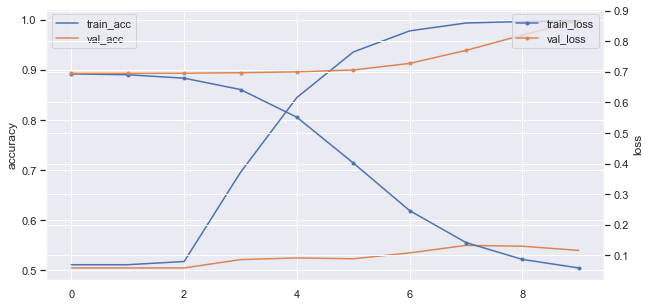

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = train_score.iloc[:, :2].plot(ax=ax)
ax2 = ax.twinx()
_ = train_score.iloc[:, 2:].plot(ax=ax2, style='.-')
_ = ax.set_ylabel('accuracy')
_ = ax2.set_ylabel('loss')
_ = ax.legend(loc=2)
_ = ax2.legend(loc=1)

### train final model with all data

In [149]:
"""
This cell shows you how the model will be used, you have to finish the cell below before you
can run this cell. 

Once the implementation is done, you should hype tune the parameters to find the best config

Note I only selected 2000 data points to speed up debugging, you should use all the data to train the 
final model
"""
from sklearn.model_selection import train_test_split
data = load_data("train.txt")
vocab = read_vocab("vocab.txt")
X, y = data.text, data.target
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3)
cls = CNNTextClassificationModel(vocab, sentence_length=5, window_size=3, F=100, alpha=0.02)
train_score = cls.train(X_train, y_train, X_dev, y_dev, nEpoch=20, batch_size=10)

======================================== Epoch: 1 START ========================================

	Train accuracy: 0.536286	Dev accuracy: 0.512333
	Train loss: 0.692160	Dev loss: 0.692858
	training time:  10.913seconds	predict train set time:  7.317seconds	predict dev set time:  3.315seconds
======================================== Epoch: 1 END ========================================

======================================== Epoch: 2 START ========================================

	Train accuracy: 0.663714	Dev accuracy: 0.558667
	Train loss: 0.680127	Dev loss: 0.688723
	training time:  11.583seconds	predict train set time:  6.920seconds	predict dev set time:  3.236seconds
======================================== Epoch: 2 END ========================================

======================================== Epoch: 3 START ========================================

	Train accuracy: 0.754714	Dev accuracy: 0.592667
	Train loss: 0.615063	Dev loss: 0.671597
	training time:  12.285seconds	pre

In [152]:
train_score = pd.DataFrame(train_score, columns=['train_acc', 'val_acc', 'train_loss', 'val_loss'])

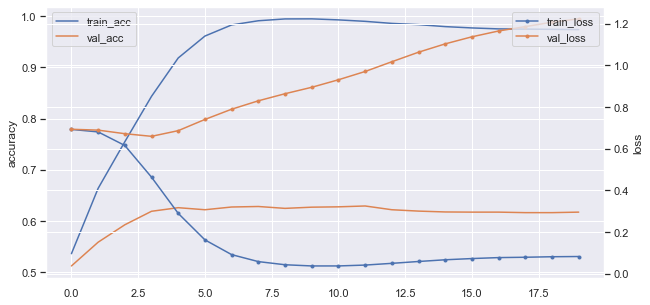

In [163]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = train_score.iloc[:, :2].plot(ax=ax)
ax2 = ax.twinx()
_ = train_score.iloc[:, 2:].plot(ax=ax2, style='.-')
_ = ax.set_ylabel('accuracy')
_ = ax2.set_ylabel('loss')
_ = ax.legend(loc=2)
_ = ax2.legend(loc=1)

In [164]:
from utils.hw1 import save_prediction

In [165]:
test_data = load_data("test.txt")
X_test = test_data.text
X_test = cls.pipeline(X_test)
pred, _ = cls.predict(X_test)
save_prediction(pred)

# Optional: Build your model using Keras + Tensorflow

So far we have always forced you to implement things from scratch. You may feel it's overwhelming, but fortunately, it is not how the real world works. In the real world, there are existing tools you can leverage, so you can focus on the most innovative part of your work. We asked you to do all the previous execises for learning purpose, and since you have already reached so far, it's time to unleash yourself and allow you the access to the real world toolings.

## Sample model 

In [11]:
# First let's see how you can build a similar CNN model you just had using Keras
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

MAX_LENGTH = 100

In [13]:
# Yes! it is a good practice to do data processing outside the ML model
wnet = WordNetLemmatizer()
# Numerical encode all the words
unknown = vocab['__unknown__']
X_train2 = [[vocab.get(wnet.lemmatize(w), unknown) for w in word_tokenize(sent)] for sent in X_train]
X_dev2 = [[vocab.get(wnet.lemmatize(w), unknown)for w in word_tokenize(sent)] for sent in X_dev]

# Tensorflow does not handle variable length input well, let's unify all input to the same length
def trim_X(X, max_length=100, default=vocab['.']):
    for i in range(len(X)):
        if len(X[i]) > max_length:
            X[i] = X[i][:max_length]
        elif len(X[i]) < max_length:
            X[i] = X[i] + [default] * (max_length - len(X[i]))
            
    return np.array(X)
            
X_train2 = trim_X(X_train2, MAX_LENGTH)
X_dev2 = trim_X(X_dev2, MAX_LENGTH)


# Now we have all the input data nicely encoded with numerical label, and each of the input data are trimmed 
# to have the same length. We would have needed to further apply one-hot encode for each word. However, this 
# would be very expensive, since each word will be expanded into a len(vocab) (~10000) length vector. Keras does
# not support sparse matrix input at this moment. But don't worry, we will use an advanced technique called embedding
# layer. This concept will be introduced in the next lesson. At this moment, you don't have to understand why.

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=len(vocab), input_length=MAX_LENGTH, output_dim=1024, name="Embedding-1"))
model.add(Conv1D(filters=100, kernel_size=2, activation="tanh", name="Conv1D-1"))
model.add(GlobalMaxPooling1D(name="MaxPooling1D-1"))
model.add(Dense(1, activation="sigmoid", name="Dense-1"))
print(model.summary())

show_keras_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding-1 (Embedding)      (None, 100, 1024)         10241024  
_________________________________________________________________
Conv1D-1 (Conv1D)            (None, 99, 100)           204900    
_________________________________________________________________
MaxPooling1D-1 (GlobalMaxPoo (None, 100)               0         
_________________________________________________________________
Dense-1 (Dense)              (None, 1)                 101       
Total params: 10,446,025
Trainable params: 10,446,025
Non-trainable params: 0
_________________________________________________________________
None


AssertionError: 

In [15]:
# Train the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.fit(X_train2, y_train, epochs=10, validation_data=(X_dev2, y_dev))

Epoch 1/10
44/44 [==============================] - 27s 221ms/step - loss: 0.6848 - accuracy: 0.5468 - val_loss: 0.6718 - val_accuracy: 0.5733
Epoch 2/10
44/44 [==============================] - 9s 213ms/step - loss: 0.5433 - accuracy: 0.8474 - val_loss: 0.6514 - val_accuracy: 0.5983
Epoch 3/10
44/44 [==============================] - 10s 226ms/step - loss: 0.3500 - accuracy: 0.9517 - val_loss: 0.6543 - val_accuracy: 0.6200
Epoch 4/10
44/44 [==============================] - 11s 243ms/step - loss: 0.1575 - accuracy: 0.9911 - val_loss: 0.7070 - val_accuracy: 0.6267
Epoch 5/10
44/44 [==============================] - 11s 240ms/step - loss: 0.0603 - accuracy: 0.9996 - val_loss: 0.7950 - val_accuracy: 0.6233
Epoch 6/10
44/44 [==============================] - 10s 232ms/step - loss: 0.0249 - accuracy: 0.9999 - val_loss: 0.8918 - val_accuracy: 0.6183
Epoch 7/10
44/44 [==============================] - 10s 219ms/step - loss: 0.0128 - accuracy: 0.9997 - val_loss: 0.9527 - val_accuracy: 0.6150


## Play with your own model

We have shown you have to use an industry level tool to build a CNN model. Hopefully you think it is simpler than the version we built from scratch. Not really? Read Keras Documentation and learn more: https://keras.io/ 

In [ ]:
# # Now it's your turn to build some more complicated CNN models

"""
Implement your code here
"""